In [1]:
# reproduce in sql
# calc entropy by precinct
# to merge--need to preserve county_fips or county_ansi
# what to do with -0? uncontested race? or all NAs? look more closely
# 2016--includes only house race in Va (no senate race that year)

def entropy(filename):
    '''
    given csv elections data in filename in MIT Election Data and Science Lab format, 
        return dataframe with column for entropy for each race
          = - sum_i p_i log2(p_i)
      and 'color' (share of democratic vote)
      reference for expected data:
        MIT Election Data and Science Lab, 2022, "Precinct-Level Returns 2018 by Individual State", https://doi.org/10.7910/DVN/NVQYMG, Harvard Dataverse, V1, UNF:6:SwtabUdCVrn80v9AOUGuiw== [fileUNF]
        https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/NVQYMG
    '''
    import pandas as pd
    import numpy as np
    
    df0 = pd.read_csv(filename)
    
    office_list = ["US HOUSE","US SENATE","US House","US Senate"]
    df_short = df0.loc[:,["precinct","office","county_name","county_fips","party_detailed","votes"]] \
                            .dropna(subset=["party_detailed"]) \
                            [df0['office'].isin(office_list)]
    df_sums = df_short.groupby(by=["county_name","county_fips","office","party_detailed"]).sum()
    df=df_sums.unstack()
    
    party_list = get_party_names(df)
    print("party_list",party_list)
    
    df['total_votes'] = 0
    df['entropy'] =0
    
    for party in party_list:
        df['total_votes'] += df.fillna(0)[('votes',party)]
        if party[:3].lower() == 'dem':
            dem = party
    
    for party in party_list:
        df['entropy'] -= df.fillna(0)[('votes',party)]/df['total_votes'] \
                        *np.log2(df.fillna(1)[('votes',party)]/df['total_votes'])  
    
    
    
    df['color'] = df[('votes',dem)]/df['total_votes']     
        
    return df.reset_index()

def get_party_names(df):
    cols = df.columns.tolist()
    party_names=[]
    for col in cols:
        if type(col) is tuple and col[0]=='votes':
            party_names.append(col[1])
            
    return party_names


party_list ['DEMOCRAT', 'LIBERTARIAN', 'REPUBLICAN']


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (2,3,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-1-f0476c75a120>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_short = df0.loc[:,["precinct","office","county_name","county_fips","party_detailed","votes"]] \


count    266.000000
mean       0.958337
std        0.161735
min        0.000000
25%        0.917355
50%        0.992145
75%        1.053043
max        1.189608
Name: entropy, dtype: float64

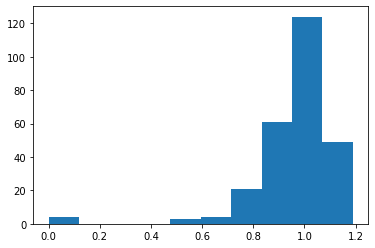

In [2]:
import matplotlib.pyplot as plt
file = 'data/2018-va-precinct-general.csv'   
df_2018 = entropy(file)
plt.hist(df_2018['entropy'])
df_2018['entropy'].describe()

party_list ['DEMOCRAT', 'INDEPENDENT', 'REPUBLICAN']


<ipython-input-1-f0476c75a120>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_short = df0.loc[:,["precinct","office","county_name","county_fips","party_detailed","votes"]] \


(array([ 27.,   0.,   0.,   0.,   3.,   4.,  16.,  68., 143.,   5.]),
 array([0.        , 0.11467869, 0.22935738, 0.34403607, 0.45871476,
        0.57339345, 0.68807214, 0.80275083, 0.91742952, 1.03210821,
        1.1467869 ]),
 <BarContainer object of 10 artists>)

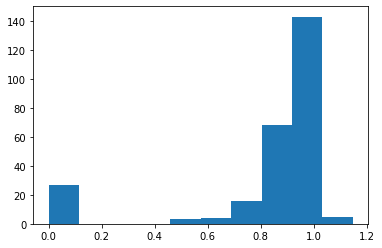

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
file = 'data/2020-va-precinct-general.csv'   
df_2020 = entropy(file)
plt.hist(df_2020['entropy'])


party_list ['Democrat', 'Republican']


<ipython-input-1-f0476c75a120>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_short = df0.loc[:,["precinct","office","county_name","county_fips","party_detailed","votes"]] \


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  2., 22., 36., 71.]),
 array([0.        , 0.09999994, 0.19999988, 0.29999982, 0.39999975,
        0.49999969, 0.59999963, 0.69999957, 0.79999951, 0.89999945,
        0.99999939]),
 <BarContainer object of 10 artists>)

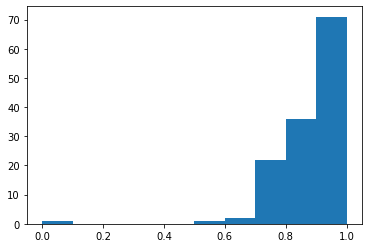

In [4]:
file = "data/MIT_data_2016_HouseSenate_merged.csv"
df_2016 = entropy(file)
plt.hist(df_2016['entropy'])

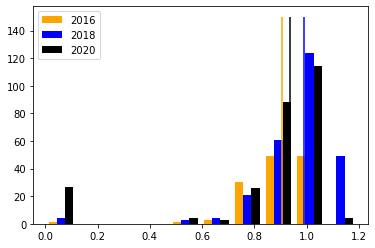

In [5]:
plt.hist([df_2016['entropy'],df_2018["entropy"],df_2020["entropy"]],color=['orange','blue','black'])
plt.legend(["2016","2018","2020"])
median_2016 = df_2016['entropy'].median()
plt.vlines(median_2016,0,150,'orange')
median_2018 = df_2018['entropy'].median()
plt.vlines(median_2018,0,150,'blue')
median_2020 = df_2020['entropy'].median()
plt.vlines(median_2020,0,150,'black')
plt.show()

In [6]:
#plot median, mean, etc
#add interpretation

In [7]:
median_2016

0.9075623105715451

In [8]:
def ent(x):
    import numpy as np
    z = [xi/sum(x) for xi in x]
    e = -sum([zi*np.log2(zi) for zi in z])
    return e

In [9]:
ent([1,20000])

0.0007864828502181944

In [10]:
reset_df = df_2018.reset_index()
reset_df.head()

index      county_name county_fips     office    votes  \
party_detailed                                               DEMOCRAT   
0                  0         ACCOMACK       51001   US HOUSE   5729.0   
1                  1         ACCOMACK       51001  US SENATE   5997.0   
2                  2        ALBEMARLE       51003   US HOUSE  34409.0   
3                  3        ALBEMARLE       51003  US SENATE  35701.0   
4                  4  ALEXANDRIA CITY       51510   US HOUSE  52006.0   

                                      total_votes   entropy     color  
party_detailed LIBERTARIAN REPUBLICAN                                  
0                      NaN     7025.0     12754.0  0.992539  0.449192  
1                    135.0     6605.0     12737.0  1.072478  0.470833  
2                      NaN    18807.0     53216.0  0.937076  0.646591  
3                   1161.0    16371.0     53233.0  1.030074  0.670655  
4                      NaN    13569.0     65575.0  0.735561  0.793077

In [ ]:
df_2018.head()